I worked on this project for a Python elective course during my doctoral studies in economics at PIMES for approximately three months. The project required the inclusion of at least one section on web scraping and data visualization. While many sections of the project were not covered in the course, particularly the libraries I utilized, there were also other course sections that were not included in the project. I selected Covid-19 as the theme for this project, and the data was scraped from the web on April 5th 2023 (the data on covid19project_andreluizcoelho.ipynb on the same repository was scraped on July 30th, 2021). Any data analyzed can be downloaded using the links provided throughout the project.

# Covid-19 

## 1. Webscraping Covid-19 Total and Death Cases

In [1]:
#importing libraries

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
#defining the url

In [4]:
url = 'https://www.worldometers.info/coronavirus/'

In [5]:
url

'https://www.worldometers.info/coronavirus/'

In [6]:
#get request to get the raw html content

In [7]:
html_content = requests.get(url).text

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<lin
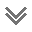

In [8]:
html_content

In [9]:
#parsing the html code for the entire site

In [10]:
soup = BeautifulSoup(html_content, 'lxml')

In [11]:
#print the parsed data of html

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
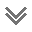

In [12]:
print(soup.prettify())

In [13]:
#picking the id of the table to scrape and extract html for only the specific table

In [14]:
covid_table = soup.find('table', attrs = {'id': 'main_table_countries_today'})

In [15]:
#head will form the columns

In [16]:
head = covid_table.thead.find_all('tr') 
#the <table> tag defines an HTML table 
#each table row is defined with a <tr> tag
#A <tr> element contains one or more <th> or <td> elements
#each table data/cell is defined with a <td> tag
#The <th> tag defines a header cell in an HTML table

In [17]:
head #headers are inside this html code

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>]

In [18]:
#extracting headers from html to a list

In [19]:
headings = []
for th in head[0].find_all('th'):
    #removing newlines and extra spaces from left and right
    print(th.text)
    headings.append(th.text.replace('\n','').strip())
print(headings)

#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl
1 Deathevery X ppl
1 Testevery X ppl
New Cases/1M pop
New Deaths/1M pop
Active Cases/1M pop
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [20]:
#extracting the rest of rows with tbody element

In [21]:
body = covid_table.tbody.find_all('tr')

In [22]:
body

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>125,757,735</td>
 <td>+2,930</td>
 <td>1,623,020</td>
 <td>+13</td>
 <td>121,356,872</td>
 <td>+2,821</td>
 <td>2,777,843</td>
 <td>7,061</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <!-- 1 Case every X -->
 <td>
 </td>
 <!-- 1 Death every X -->
 <td></td>
 <!-- 1 test every X -->
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>215,366,500</td>
 <td>+26,242</td>
 <td>1,540,992</td>
 <td>+45</td>
 <td>199,939,630</td>
 <td>+21,591</td>
 <td>13,885,878</td>
 <td>15,557</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" styl

In [23]:
body[0] #the first row for example

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>125,757,735</td>
<td>+2,930</td>
<td>1,623,020</td>
<td>+13</td>
<td>121,356,872</td>
<td>+2,821</td>
<td>2,777,843</td>
<td>7,061</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [24]:
#appending the values of rows into a list, since there are lists inside a list here
#declaring empty list data that'll hold all rows data

In [25]:
data = []
for r in range(1, len(body)):
    row = [] #empty list to hold one row data
    for tr in body[r].find_all('td'):
        row.append(tr.text.replace('\n','').strip())
        #appending row data to row after removing newlines escape and triming unnecessary spaces
    data.append(row)

In [26]:
data

[['',
  'Asia',
  '215,366,500',
  '+26,242',
  '1,540,992',
  '+45',
  '199,939,630',
  '+21,591',
  '13,885,878',
  '15,557',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  'Europe',
  '247,975,158',
  '+23,327',
  '2,031,654',
  '+125',
  '243,656,835',
  '+56,925',
  '2,286,669',
  '6,421',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  'South America',
  '68,397,845',
  '+1,535',
  '1,352,933',
  '+1',
  '66,414,624',
  '+3,113',
  '630,288',
  '10,183',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  'Oceania',
  '14,018,297',
  '',
  '26,715',
  '',
  '13,838,930',
  '',
  '152,652',
  '61',
  '',
  '',
  '',
  '',
  '',
  'Australia/Oceania',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  'Africa',
  '12,812,815',
  '+285',
  '258,665',
  '',
  '12,080,928',
  '+7',
  '473,222',
  '548',
  '',
  '',
  '',
  '',
  '',
  'Africa',
  '',
  '',
  '',
  '',
  '',

In [27]:
row

['231',
 'China',
 '503,302',
 '',
 '5,272',
 '',
 '379,053',
 '',
 '118,977',
 'N/A',
 '347',
 '4',
 '160,000,000',
 '110,461',
 '1,448,471,400',
 'Asia',
 '2,878',
 '274,748',
 '9',
 '',
 '',
 '82']

In [28]:
#data contains all the rows excluding header
#row contains data for one row

In [29]:
#passing the values on the body as the data and headings as the columns 
#to a DataFrame

In [30]:
#with headings as the columns

In [31]:
df = pd.DataFrame(data, columns = headings)

In [32]:
df

#   Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
0                   Asia  215,366,500  +26,242   1,540,992       +45   
1                 Europe  247,975,158  +23,327   2,031,654      +125   
2          South America   68,397,845   +1,535   1,352,933        +1   
3                Oceania   14,018,297               26,715             
4                 Africa   12,812,815     +285     258,665             
..   ...             ...          ...      ...         ...       ...   
233  227    Vatican City           29                                  
234  228  Western Sahara           10                    1             
235  229      MS Zaandam            9                    2             
236  230         Tokelau            5                                  
237  231           China      503,302                5,272             

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ...  \
0      199,939,630      +21,591  13,885,878           15,557  ...   
1      243,656,835      +56,925   2,286,669            6,421  ...   
2       66,414,624       +3,113     630,288           10,183  ...   
3       13,838,930                  152,652               61  ...   
4       12,080,928           +7     473,222              548  ...   
..             ...          ...         ...              ...  ...   
233             29                        0                   ...   
234              9                        0                   ...   
235              7                        0                   ...   
236                                       5                   ...   
237        379,053                  118,977              N/A  ...   

      TotalTests Tests/1M pop     Population          Continent  \
0                                                          Asia   
1                                                        Europe   
2                                                 South America   
3                                             Australia/Oceania   
4                                                        Africa   
..           ...          ...            ...                ...   
233                                      799             Europe   
234                                  626,161             Africa   
235                                                               
236                                    1,378  Australia/Oceania   
237  160,000,000      110,461  1,448,471,400               Asia   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             
..                ...                ...               ...              ...   
233                28                                                         
234            62,616            626,161                                      
235                                                                           
236               276                                                         
237             2,878            274,748                 9                    

    New Deaths/1M pop Active Cases/1M pop  
0                                          
1                                          
2                                          
3                                          
4                                          
..                ...                 ...  
233                                        
234                                        
235                                        
236                                 3,628  
237                                    82  

[238 rows x 22 columns]

In [33]:
df.shape

(238, 22)

In [34]:
df.head()

#  Country,Other   TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0             Asia  215,366,500  +26,242   1,540,992       +45    199,939,630   
1           Europe  247,975,158  +23,327   2,031,654      +125    243,656,835   
2    South America   68,397,845   +1,535   1,352,933        +1     66,414,624   
3          Oceania   14,018,297               26,715               13,838,930   
4           Africa   12,812,815     +285     258,665               12,080,928   

  NewRecovered ActiveCases Serious,Critical  ... TotalTests Tests/1M pop  \
0      +21,591  13,885,878           15,557  ...                           
1      +56,925   2,286,669            6,421  ...                           
2       +3,113     630,288           10,183  ...                           
3                  152,652               61  ...                           
4           +7     473,222              548  ...                           

  Population          Continent 1 Caseevery X ppl 1 Deathevery X ppl  \
0                          Asia                                        
1                        Europe                                        
2                 South America                                        
3             Australia/Oceania                                        
4                        Africa                                        

  1 Testevery X ppl New Cases/1M pop New Deaths/1M pop Active Cases/1M pop  
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4                                                                           

[5 rows x 22 columns]

In [35]:
df.head(10)

#  Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
0              Asia  215,366,500  +26,242   1,540,992       +45   
1            Europe  247,975,158  +23,327   2,031,654      +125   
2     South America   68,397,845   +1,535   1,352,933        +1   
3           Oceania   14,018,297               26,715             
4            Africa   12,812,815     +285     258,665             
5                            721                   15             
6             World  684,329,071  +54,319   6,833,994      +184   
7  1            USA  106,273,691            1,155,668             
8  2          India   44,733,719              530,916             
9  3         France   39,817,657   +9,922     165,794       +58   

  TotalRecovered NewRecovered ActiveCases Serious,Critical  ...  \
0    199,939,630      +21,591  13,885,878           15,557  ...   
1    243,656,835      +56,925   2,286,669            6,421  ...   
2     66,414,624       +3,113     630,288           10,183  ...   
3     13,838,930                  152,652               61  ...   
4     12,080,928           +7     473,222              548  ...   
5            706                        0                0  ...   
6    657,288,525      +84,457  20,206,552           39,831  ...   
7    104,055,782                1,062,241            1,895  ...   
8     44,179,712                   23,091              N/A  ...   
9     39,517,646      +16,280     134,217              869  ...   

      TotalTests Tests/1M pop     Population          Continent  \
0                                                          Asia   
1                                                        Europe   
2                                                 South America   
3                                             Australia/Oceania   
4                                                        Africa   
5                                                                 
6                                                           All   
7  1,174,878,661    3,509,140    334,805,269      North America   
8    922,033,777      655,491  1,406,631,776               Asia   
9    271,490,188    4,139,547     65,584,518             Europe   

  1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4                                                                           
5                                                                           
6                                                                           
7                 3                290                 0                    
8                31              2,649                 2                    
9                 2                396                 0              151   

  New Deaths/1M pop Active Cases/1M pop  
0                                        
1                                        
2                                        
3                                        
4                                        
5                                        
6                                        
7                                 3,173  
8                                    16  
9               0.9               2,046  

[10 rows x 22 columns]

In [36]:
df.tail()

#   Country,Other TotalCases NewCases TotalDeaths NewDeaths  \
233  227    Vatican City         29                                  
234  228  Western Sahara         10                    1             
235  229      MS Zaandam          9                    2             
236  230         Tokelau          5                                  
237  231           China    503,302                5,272             

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ...  \
233             29                        0                   ...   
234              9                        0                   ...   
235              7                        0                   ...   
236                                       5                   ...   
237        379,053                  118,977              N/A  ...   

      TotalTests Tests/1M pop     Population          Continent  \
233                                      799             Europe   
234                                  626,161             Africa   
235                                                               
236                                    1,378  Australia/Oceania   
237  160,000,000      110,461  1,448,471,400               Asia   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
233                28                                                         
234            62,616            626,161                                      
235                                                                           
236               276                                                         
237             2,878            274,748                 9                    

    New Deaths/1M pop Active Cases/1M pop  
233                                        
234                                        
235                                        
236                                 3,628  
237                                    82  

[5 rows x 22 columns]

In [37]:
#to end up with the data only from today, it's needed to remove duplicates, because the data is kept up to three days on the website

In [38]:
data=df[df['#']!=''].reset_index(drop=True)

In [39]:
#the data points with # value are the contries while data points with null values for # columns are features like continents, totals, etc

In [40]:
data

#   Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
0      1             USA  106,273,691            1,155,668             
1      2           India   44,733,719              530,916             
2      3          France   39,817,657   +9,922     165,794       +58   
3      4         Germany   38,363,343              171,169             
4      5          Brazil   37,319,254              700,556             
..   ...             ...          ...      ...         ...       ...   
226  227    Vatican City           29                                  
227  228  Western Sahara           10                    1             
228  229      MS Zaandam            9                    2             
229  230         Tokelau            5                                  
230  231           China      503,302                5,272             

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ...  \
0      104,055,782                1,062,241            1,895  ...   
1       44,179,712                   23,091              N/A  ...   
2       39,517,646      +16,280     134,217              869  ...   
3       38,104,500       +6,900      87,674              N/A  ...   
4       36,249,161                  369,537              N/A  ...   
..             ...          ...         ...              ...  ...   
226             29                        0                   ...   
227              9                        0                   ...   
228              7                        0                   ...   
229                                       5                   ...   
230        379,053                  118,977              N/A  ...   

        TotalTests Tests/1M pop     Population          Continent  \
0    1,174,878,661    3,509,140    334,805,269      North America   
1      922,033,777      655,491  1,406,631,776               Asia   
2      271,490,188    4,139,547     65,584,518             Europe   
3      122,332,384    1,458,359     83,883,596             Europe   
4       63,776,166      296,146    215,353,593      South America   
..             ...          ...            ...                ...   
226                                        799             Europe   
227                                    626,161             Africa   
228                                                                 
229                                      1,378  Australia/Oceania   
230    160,000,000      110,461  1,448,471,400               Asia   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                   3                290                 0                    
1                  31              2,649                 2                    
2                   2                396                 0              151   
3                   2                490                 1                    
4                   6                307                 3                    
..                ...                ...               ...              ...   
226                28                                                         
227            62,616            626,161                                      
228                                                                           
229               276                                                         
230             2,878            274,748                 9                    

    New Deaths/1M pop Active Cases/1M pop  
0                                   3,173  
1                                      16  
2                 0.9               2,046  
3                                   1,045  
4                                   1,716  
..                ...                 ...  
226                                        
227                                        
228                                        
229                                 3,628  
230                                    82  

[231 r

In [41]:
data = data.drop_duplicates(subset = ['Country,Other'])

In [42]:
#because the worldmeter reports data for up to three days, counting today to two days back, there's a need to drop duplicates
#when duplicates are removed, the values for the last two days are removed, while today´s values are kept

In [43]:
data.head()

# Country,Other   TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0  1           USA  106,273,691            1,155,668              104,055,782   
1  2         India   44,733,719              530,916               44,179,712   
2  3        France   39,817,657   +9,922     165,794       +58     39,517,646   
3  4       Germany   38,363,343              171,169               38,104,500   
4  5        Brazil   37,319,254              700,556               36,249,161   

  NewRecovered ActiveCases Serious,Critical  ...     TotalTests Tests/1M pop  \
0                1,062,241            1,895  ...  1,174,878,661    3,509,140   
1                   23,091              N/A  ...    922,033,777      655,491   
2      +16,280     134,217              869  ...    271,490,188    4,139,547   
3       +6,900      87,674              N/A  ...    122,332,384    1,458,359   
4                  369,537              N/A  ...     63,776,166      296,146   

      Population      Continent 1 Caseevery X ppl 1 Deathevery X ppl  \
0    334,805,269  North America                 3                290   
1  1,406,631,776           Asia                31              2,649   
2     65,584,518         Europe                 2                396   
3     83,883,596         Europe                 2                490   
4    215,353,593  South America                 6                307   

  1 Testevery X ppl New Cases/1M pop New Deaths/1M pop Active Cases/1M pop  
0                 0                                                  3,173  
1                 2                                                     16  
2                 0              151               0.9               2,046  
3                 1                                                  1,045  
4                 3                                                  1,716  

[5 rows x 22 columns]

In [44]:
#if some columns are wished to be dropped, as the ones below

In [45]:
cols = ['#', 
        'Tot\xa0Cases/1M pop',
        'Deaths/1M pop',
        'Tests/1M pop', 
        '1 Caseevery X ppl',
        '1 Deathevery X ppl',
        '1 Testevery X ppl']

In [46]:
cols

['#',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'Tests/1M pop',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl']

In [47]:
data_final = data.drop(cols, axis=1)

In [48]:
data_final.head()

Country,Other   TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0           USA  106,273,691            1,155,668              104,055,782   
1         India   44,733,719              530,916               44,179,712   
2        France   39,817,657   +9,922     165,794       +58     39,517,646   
3       Germany   38,363,343              171,169               38,104,500   
4        Brazil   37,319,254              700,556               36,249,161   

  NewRecovered ActiveCases Serious,Critical     TotalTests     Population  \
0                1,062,241            1,895  1,174,878,661    334,805,269   
1                   23,091              N/A    922,033,777  1,406,631,776   
2      +16,280     134,217              869    271,490,188     65,584,518   
3       +6,900      87,674              N/A    122,332,384     83,883,596   
4                  369,537              N/A     63,776,166    215,353,593   

       Continent New Cases/1M pop New Deaths/1M pop Active Cases/1M pop  
0  North America                                                  3,173  
1           Asia                                                     16  
2         Europe              151               0.9               2,046  
3         Europe                                                  1,045  
4  South America                                                  1,716

In [49]:
data_final.tail()

Country,Other TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
226    Vatican City         29                                            29   
227  Western Sahara         10                    1                        9   
228      MS Zaandam          9                    2                        7   
229         Tokelau          5                                                 
230           China    503,302                5,272                  379,053   

    NewRecovered ActiveCases Serious,Critical   TotalTests     Population  \
226                        0                                          799   
227                        0                                      626,161   
228                        0                                                
229                        5                                        1,378   
230                  118,977              N/A  160,000,000  1,448,471,400   

             Continent New Cases/1M pop New Deaths/1M pop Active Cases/1M pop  
226             Europe                                                         
227             Africa                                                         
228                                                                            
229  Australia/Oceania                                                  3,628  
230               Asia                                                     82

In [50]:
data_final

Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
0               USA  106,273,691            1,155,668             
1             India   44,733,719              530,916             
2            France   39,817,657   +9,922     165,794       +58   
3           Germany   38,363,343              171,169             
4            Brazil   37,319,254              700,556             
..              ...          ...      ...         ...       ...   
226    Vatican City           29                                  
227  Western Sahara           10                    1             
228      MS Zaandam            9                    2             
229         Tokelau            5                                  
230           China      503,302                5,272             

    TotalRecovered NewRecovered ActiveCases Serious,Critical     TotalTests  \
0      104,055,782                1,062,241            1,895  1,174,878,661   
1       44,179,712                   23,091              N/A    922,033,777   
2       39,517,646      +16,280     134,217              869    271,490,188   
3       38,104,500       +6,900      87,674              N/A    122,332,384   
4       36,249,161                  369,537              N/A     63,776,166   
..             ...          ...         ...              ...            ...   
226             29                        0                                   
227              9                        0                                   
228              7                        0                                   
229                                       5                                   
230        379,053                  118,977              N/A    160,000,000   

        Population          Continent New Cases/1M pop New Deaths/1M pop  \
0      334,805,269      North America                                      
1    1,406,631,776               Asia                                      
2       65,584,518             Europe              151               0.9   
3       83,883,596             Europe                                      
4      215,353,593      South America                                      
..             ...                ...              ...               ...   
226            799             Europe                                      
227        626,161             Africa                                      
228                                                                        
229          1,378  Australia/Oceania                                      
230  1,448,471,400               Asia                                      

    Active Cases/1M pop  
0                 3,173  
1                    16  
2                 2,046  
3                 1,045  
4                 1,716  
..                  ...  
226                      
227                      
228                      
229               3,628  
230                  82  

[231 rows x 15 columns]

In [51]:
pd.set_option('display.max_rows', None)

In [52]:
data_final

Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
0                       USA  106,273,691            1,155,668             
1                     India   44,733,719              530,916             
2                    France   39,817,657   +9,922     165,794       +58   
3                   Germany   38,363,343              171,169             
4                    Brazil   37,319,254              700,556             
5                     Japan   33,491,480   +9,500      74,002       +21   
6                  S. Korea   30,871,740  +14,465      34,296        +7   
7                     Italy   25,695,311              189,089             
8                        UK   24,448,729              209,396             
9                    Russia   22,679,739   +8,636     397,420       +36   
10                   Turkey   17,042,722              101,492             
11                    Spain   13,798,747              120,426             
12                  Vietnam   11,527,454      +51      43,186             
13                Australia   11,327,773               19,856             
14                   Taiwan   10,239,998               19,005             
15                Argentina   10,044,957              130,472             
16              Netherlands    8,610,372               22,992             
17                     Iran    7,585,422              145,220             
18                   Mexico    7,547,892   +2,913     333,555       +13   
19                Indonesia    6,748,973     +665     161,039        +4   
20                   Poland    6,500,971   +1,240     119,391       +13   
21                 Colombia    6,362,312              142,678             
22                  Austria    6,041,470   +1,751      22,157             
23                   Greece    5,951,892               36,517             
24                 Portugal    5,575,030               26,408             
25                  Ukraine    5,445,979              111,558             
26                    Chile    5,269,112   +1,485      64,497             
27                 Malaysia    5,052,337               36,982             
28                   Israel    4,815,175               12,404             
29                  Belgium    4,776,837               34,059             
30                     DPRK    4,772,813                   74             
31                 Thailand    4,728,799               33,938             
32                  Czechia    4,635,346     +452      42,683        +3   
33                   Canada    4,634,277               52,121             
34                     Peru    4,494,028              219,837             
35              Switzerland    4,397,632               14,452             
36              Philippines    4,082,580     +176      66,396        +6   
37             South Africa    4,074,814     +259     102,595             
38                  Romania    3,374,825               67,917             
39                  Denmark    3,178,740      +91       8,407        +3   
40                Hong Kong    2,885,246      +99      13,482        +5   
41                   Sweden    2,701,192               23,823             
42                   Serbia    2,521,017               17,980             
43                     Iraq    2,465,545               25,375             
44              New Zealand    2,274,370                4,015             
45                Singapore    2,255,812                1,722             
46                  Hungary    2,199,764     +618      48,811        +8   
47               Bangladesh    2,038,014               29,446             
48                 Slovakia    1,865,664      +80      21,115        +1   
49                  Georgia    1,833,502               17,019             
50                   Jordan    1,746,997               14,122             
51                  Ireland    1,707,466                8,763             
52                 Pakistan    1,579,91

In [53]:
pd.set_option('display.max_rows', 100)

In [54]:
data_final

Country,Other   TotalCases NewCases TotalDeaths NewDeaths  \
0               USA  106,273,691            1,155,668             
1             India   44,733,719              530,916             
2            France   39,817,657   +9,922     165,794       +58   
3           Germany   38,363,343              171,169             
4            Brazil   37,319,254              700,556             
..              ...          ...      ...         ...       ...   
226    Vatican City           29                                  
227  Western Sahara           10                    1             
228      MS Zaandam            9                    2             
229         Tokelau            5                                  
230           China      503,302                5,272             

    TotalRecovered NewRecovered ActiveCases Serious,Critical     TotalTests  \
0      104,055,782                1,062,241            1,895  1,174,878,661   
1       44,179,712                   23,091              N/A    922,033,777   
2       39,517,646      +16,280     134,217              869    271,490,188   
3       38,104,500       +6,900      87,674              N/A    122,332,384   
4       36,249,161                  369,537              N/A     63,776,166   
..             ...          ...         ...              ...            ...   
226             29                        0                                   
227              9                        0                                   
228              7                        0                                   
229                                       5                                   
230        379,053                  118,977              N/A    160,000,000   

        Population          Continent New Cases/1M pop New Deaths/1M pop  \
0      334,805,269      North America                                      
1    1,406,631,776               Asia                                      
2       65,584,518             Europe              151               0.9   
3       83,883,596             Europe                                      
4      215,353,593      South America                                      
..             ...                ...              ...               ...   
226            799             Europe                                      
227        626,161             Africa                                      
228                                                                        
229          1,378  Australia/Oceania                                      
230  1,448,471,400               Asia                                      

    Active Cases/1M pop  
0                 3,173  
1                    16  
2                 2,046  
3                 1,045  
4                 1,716  
..                  ...  
226                      
227                      
228                      
229               3,628  
230                  82  

[231 rows x 15 columns]

In [55]:
data_final.to_excel('covidcasesdeaths_April5th2023.xlsx', index=False) #index=False saves the file without the first "Unnamed: 0" column, otherwise, there's the need to drop this column every time after openning the file

### Continue on part 2 Covid-19 Vaccines